# ENPM673 Perception for Autonomous Robots (Spring 2024) - Midterm Exam

### Deadline: 16th March 7AM

Rohan Maan, Jay Prajapati, Samer Charifa, Tommy Chang

## Submission guidelines

-	The midterm exam is to be done and submitted individually.
-	Write the solution to **all the problems in one Google Colab File. (Handwritten answers will not be allowed)**
-	Your submission on ELMS/Canvas should be the following:
    a. Google Colab (.ipynb) file
    b. Google Colab (.pdf) file (Convert the same .ipynb file to a .pdf file)
    following the naming convention YourDirectoryID_midterm.
-	Points will be deducted if you don’t follow the submission guidelines.
-	Submit all files in one attempt.
-	Provide detailed explanations for each step using text cells in Google Colab.
-	Ensure the code is well-formatted for readability.
-	Comment on each section (preferably every 2 lines) of the code to explain its purpose and functionality.
-	Include relevant output images within the text cells where required.
-	Note that the use of ChatGPT (or any other generative AI websites) is not allowed.
- You are free to use any in-built OpenCv functions **except for PCA (In Question-3)**.


## How to use this file

- Links to all the input data have been given in the text cells.
- Add this .ipynb file to your working directory on google drive.
- Add the given input files to your working directory on google drive.
- Make sure you are using Google Colab and not any other IDE.
- Placeholders to write the answers have been given in this file.
- Do not change the structure of the questions.
- You may add extra code cells or text cells for any particular question.
- Make sure that the extra cell is added under the right question.

## Enter Student Details Here

|Name|Swaraj Mundruppady Rao|
|---|---|
|UID|120127007|
|Email|swarajmr@umd.edu|

In [ ]:
# Set path to the working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/ENPM673/MidTerm

/content/drive/MyDrive/ENPM673/MidTerm


# Import Libraries

In [ ]:
# Import all your libraries here ....
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
import plotly.graph_objects as go
import pandas as pd
from google.colab.patches import cv2_imshow
import math

# Problem 1 (20 Points)

Link to input image: https://drive.google.com/file/d/1X0xir8CrOoKsNXxvZnLVAJWKztpMuUhV/view?usp=drive_link

#### Part 1: Write code and describe the steps to perform histogram equalization of the given color image.  Hint: First convert to a color space that separates the intensity from the color channels (eg. LAB or LUV color spaces work the best).  Your result should look like the below:

Link to the output of part-1: https://drive.google.com/file/d/1nIhoE0PyCdFE3LfAwGcUqUt_GaQ2NoG-/view?usp=sharing


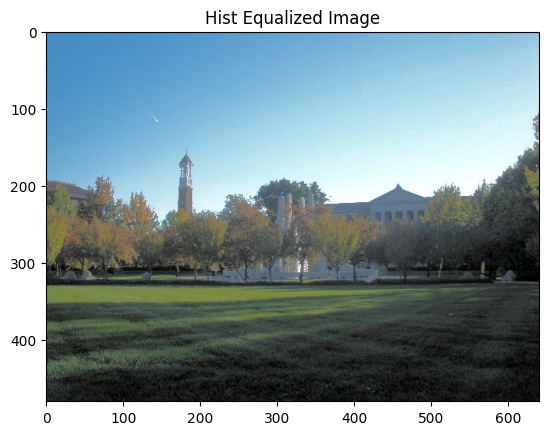

In [ ]:
# write code for problem 1 part 1 here .....

#reading the image
image1=cv2.imread('/content/drive/MyDrive/ENPM673/MidTerm/PA120272.JPG')

#Function to plot histogram of an image
def plot_histogram(image, title):
  plt.figure()
  plt.title(title)
  plt.xlabel("Value")
  plt.ylabel("Number of Pixels")
  colors = ('b', 'g', 'r')
  for i, col in enumerate(colors):
      hist = cv2.calcHist([image], [i], None, [256], [0, 256])
      plt.plot(hist, color=col)
      plt.xlim([0, 256])
  plt.show()

#converting to LAB Color space
LAB_image1=cv2.cvtColor(image1,cv2.COLOR_BGR2LAB)
# print(LAB_image1.shape)


#LAB image has 3 components L - Intensity, A-Green-Red component and B-Blue Yellow Component
L1,A,B=cv2.split(LAB_image1)

#Applying Histogram Equalization
dst1 = cv2.equalizeHist(L1)

#Merging the equalised intensity channel with the original image
equalised_image1=cv2.merge((dst1,A,B))

#Final Image ( Conversion to RGB format for plt.imshow, for cv2_imshow I would have done LAB2BGR)
result1=cv2.cvtColor(equalised_image1,cv2.COLOR_LAB2RGB)
plt.title('Hist Equalized Image')
plt.imshow(result1)


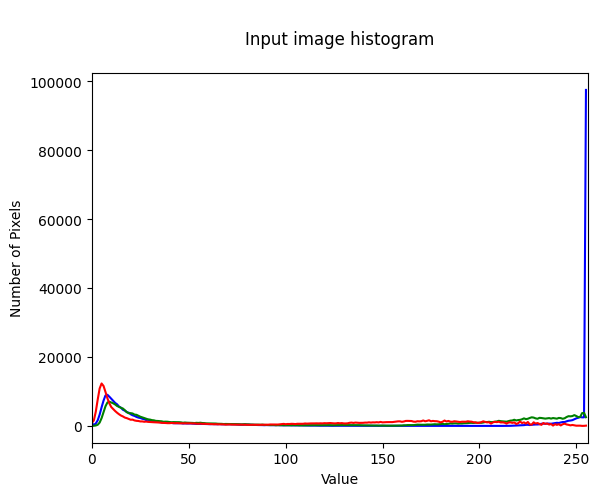

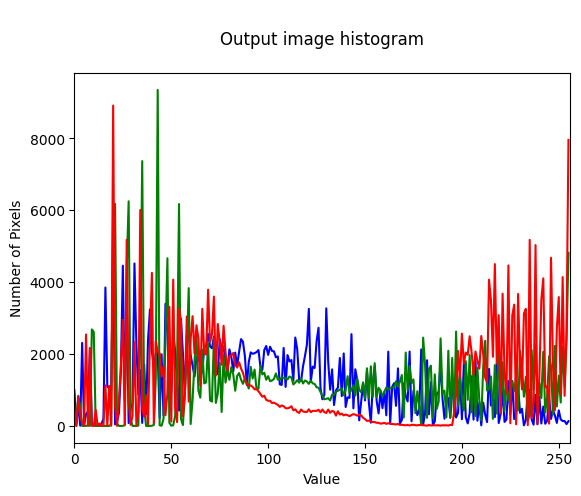

In [ ]:
#Visualising the input image histogram
plot_histogram(image1,"\nInput image histogram\n")

#Visulasing the output image histogram
plot_histogram(result1,"\nOutput image histogram\n")

#### Part 2: Another way to enhance a dark image is to perform gamma correction.   For each intensity pixel, replace it with the new intensity = 255*((intensity/255)^(1/2.2)). Write code to perform gamma correction.  Your result should look like below:

Link to the output of part-2: https://drive.google.com/file/d/1rgo7Kl8qK7Byh5QZsIb4CrfdBzY51Aco/view?usp=sharing


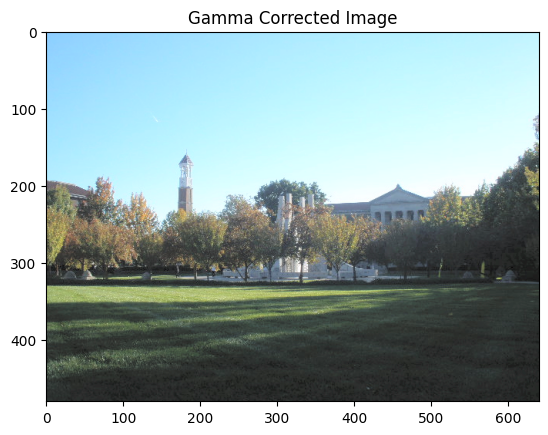

In [ ]:
# write code for problem 1 part 2 here .....

#reading the image
image2=cv2.imread('/content/drive/MyDrive/ENPM673/MidTerm/PA120272.JPG')

#converting to LAB Color space
LAB_image2=cv2.cvtColor(image2,cv2.COLOR_BGR2LAB)

#LAB image has 3 components L - Intensity, A-Green-Red component and B-Blue Yellow Component
L2,A,B=cv2.split(LAB_image2)

new_intensity=np.uint8(L2)

#Applying Histogram Equalization
for i in range(0,(L2.shape)[0]):
  for j in range(0,(L2.shape)[1]):
    new_intensity[i][j]=255*(((L2[i][j])/255)**(1/2.2))

#Merging the equalised intensity channel with the original image
equalised_image2=cv2.merge(((new_intensity),A,B))

#Final Image ( Conversion to RGB format for plt.imshow, for cv2_imshow I would have done LAB2BGR)
result2=cv2.cvtColor(equalised_image2,cv2.COLOR_LAB2RGB)
plt.title('Gamma Corrected Image')
plt.imshow(result2)

# Problem 2 (15 Points)

#### 1. For an image that is n by n and assuming that we have a random kernel call it H, where H is m by m matrix, what is the big O notation when performing convolution (how many multiplications are needed, in terms of n)?

#### 2. Describe the meaning of “separable” kernel? Redo the previous question knowing that the H kernel is separable?

#### 3. Apply the principle of separability to the following kernel to separate it into two kernels.


Kernel

<img src="https://drive.google.com/uc?id=1MMCS5erDiy2Pk_ytuyI_GSI8FdjGRUib" width="300" height="200" />

#### Problem-2 (1)
Solution :

Given that the image is of the shape n * n and that the kernel H is a m * m matrix. The Big O notation while performing convolution is...

We know that each element of the kernel is applied to each pixel of the image, so the number of multiplications that take place is m^2 for a corresponding pixel of the image

When Padding is not done,

For each pixel output image, the sliding window moves (n-m+1) * (n-m+1) times

Therefore total computations to complete the convolution is :
(n-m+1)^2 * m^2

So the **Big O notation** for the following:
((n-m+1)^2) * (m^2) is

**O((n^2)*(m^2))**

#### Problem-2 (2)
Solution :


The kernel that can be separated across axes is called the separable kernel. The kernel is broken into two smaller kernels and those kernels are multiplied sequentially with the input image to get the same effect of the full kernel.

The Big O notation for this is :

For convolving a n*n image the convolution can be performed in two steps: convolving image with m * 1 vector and convolving the result with the 1 * m vector.

The Big O notation for each of the convolution is O(n* n * m)

So the Big O notation for both the operations is O(((n^2) * m) + ((n^2) * m))

So Big O notation is  O((n^2) * m)

#### Problem-2 (3)


Applying the principle of separability, the given kernel given can be separated as follows

$$
\frac{1}{16} \left[
\begin{matrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \\
\end{matrix}
\right]
$$


$$
\frac{1}{16} \left[\begin{matrix}1&2&1\\\end{matrix}\right] \cdot \left[\begin{matrix}1\\2\\1\\\end{matrix}\right]
$$


# Problem 3 (20 Points)

Link to the csv file: https://drive.google.com/file/d/1LGG32bpU0sTIp-lOxOXCZJELGoZqVaZk/view?usp=sharing

#### Given x, y, z coordinates of n number of data points(problem3_points.csv). Consider matrix A where matrix A represents the coordinates of the n points shown in the figure below. Let’s say we want to fit these data points onto an ellipse.

#### 1. Describe the steps to find the major and minor axis of this ellipse along with their prospective length.

#### 2. Similarly, given the data that represents a flat ground in front of the robot in 3D, try to extract the equation of the surface that describe the ground.

#### Problem-3 (1)

Solution:
For the given matrix A which represents the coordinates of n points, the major and minor axis of the ellipse can be obtained thorugh the followign steps


 Step 1 : Computing the Covariance Matrix :
 For the given set of values the covariance matrix is calculated. The covariance matrix for a set of x y and z values is given by

![alt text](https://drive.google.com/uc?id=1OZPd8yYDLMEoKy-Y3PMQkjgB3fh9h6Jm)

Where Covariance can be calculated using the formula

![alt text](https://drive.google.com/uc?id=1VRRHAtL_d97BJ-Cf5Qmh_6DmmFiFpc7F)

and Variance can be calculated using the formula

![alt text](https://drive.google.com/uc?id=1wUBdv9teXKDzY7Xm6V7aWLFs_Jao-5Cs)

  Step 2 : Compute the Eigenvector of the covariance matrix. The Eigenvalues and eigenvector give an indication of the distribution of the data in what direction, and the stretch of the data.

  The larger value Eigenvalue represents the major axis and the smaller eigen value represents the minor axis







#### Problem-3 (2) : Solution

Coefficients: A = 0.5773502691833708  B = 3.710721400290717e-12  C = -9.175249969517463e-12




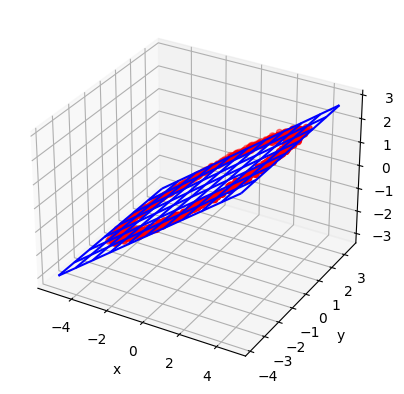

In [ ]:
import matplotlib.pyplot as plt
csvdata=pd.read_csv('/content/drive/MyDrive/ENPM673/MidTerm/problem3_points.csv')

#Getting the x y and z data from the csv data
xs = np.array(csvdata['X'])
ys = np.array(csvdata['Y'])
zs = np.array(csvdata['Z'])

#Plot the points using ScatterPlot
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='r')

#Fitting a plane using z=Ax+By+C
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b

#Printing the coefficients A , B and C
print("Coefficients: A =",fit[0,0], " B =", fit[1,0], " C =", fit[2,0])
print("\n")


# plotting plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),np.arange(ylim[0], ylim[1]))

#Initialising the Z to reduce computation time
Z = np.zeros(X.shape)

#Calulating Z by using the obtained Coefficient values
for r in range(X.shape[0]):
  for c in range(X.shape[1]):
    Z[r,c] = fit[0,0] * X[r,c] + fit[1,0] * Y[r,c] + fit[2,0]

ax.plot_wireframe(X,Y,Z, color='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Problem 4 (30 Points)

Link to the input image: https://drive.google.com/file/d/1VeZyrPIwyg7sqi_I6N5zBUJP9UHkyDEb/view?usp=sharing

#### Given the photo of a train track, describe the process to find the mean distance in pixels between the train tracks for every row of the image where train tracks appear. This question contains two parts:

#### 1. Design Pipeline and explain the requirement of each step
#### 2. Write code to implement the pipeline

#### Problem-4 (1)
Edit this text cell to enter pipeline details

Solution:


Pipeline for computing the distance between pixels of the train tracks from the given image:

1.   Read the given image
2.   Define the source(points of interest) and destination(points to convert to) points for transforming the perspective to obtain the top view of the train track
3.   Warp the transformed perspective image to the required dimensions(The dimension is kept same as the original image dimentions to avoid any difference between the calculated pixel distance values)
4. Detect the edges of the image. This can be done using the following sequence : convert original image to gray -> using suitable threshold convert the image to a binary image - > detect the edges using Canny edge detector

5.  Using Hough Transform find the lines for the detected edge image
6. Iterate over the points and plot them on the image
7. Calculate the maximum distance betwwen the detected lines(Note: The average distance between the parallel tracks will be the same throughout the detected lines, hence calculating the line distance fulfills the requirements)



#### Problem-4 (2)

In [ ]:
image4=cv2.imread('/content/drive/MyDrive/ENPM673/MidTerm/train_track.jpg')

#Points of interest to make the track parallel
points_of_interest_image=((1360,1230), (1665,1230), (867,2000), (2155,2000))
points_to_convert_to=((930,1230), (2095,1230), (867,2000), (2155,2000))

#Converting Points of Interest and Points to Convert to to numpy arrays
poi = np.array(points_of_interest_image, np.float32)
ptct = np.array(points_to_convert_to, np.float32)

#Transforming the image according to the points of interest observed
TransformationMatrix = cv2.getPerspectiveTransform(poi, ptct)

#transform image to a top view image
topviewimage = cv2.warpPerspective(image4, TransformationMatrix, (3000,2000))

#Convert image to gray to detect edges
grayp4=cv2.cvtColor(topviewimage,cv2.COLOR_BGR2GRAY)

#Applying Gaussian Blur to detect edges
blurredp4=cv2.GaussianBlur(grayp4, (7,7), 0, 0)

#Converting the image to binary
_, binaryp4 = cv2.threshold(blurredp4, 225, 255, cv2.THRESH_BINARY)

#Detecting the edges using Canny Edge Detector
edgesp4=cv2.Canny(binaryp4,50,150)

#Hough line transform for the detected edges
linesp4=cv2.HoughLines(edgesp4,1,np.pi/180,300,None,0,0)

# Initialize Line_Info with appropriate size
Line_Info = np.zeros((len(linesp4), 1))

#Draw lines obtained using Hough Lines Transform
if linesp4 is not None:
  for i in range(0, len(linesp4)):
    rho = linesp4[i][0][0]
    theta = linesp4[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 10000 * (-b)), int(y0 + 10000 * (a)))
    Line_Info[i][0] = pt1[0]  # X data
    pt2 = (int(x0 - 10000 * (-b)), int(y0 - 10000 * (a)))
    cv2.line(topviewimage, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

#initialising the lowest distance with a value
CurrentMin = Line_Info[0]
#Settign Current Maximum distance as zero until it gets updated
CurrentMaxDist = 0

#Calcuating the distance between lines
for i in range(len(Line_Info)):
  if (Line_Info[i] < CurrentMin):
    CurrentMin = Line_Info[i]
  elif (Line_Info[i] - CurrentMin > CurrentMaxDist):
    CurrentMaxDist = Line_Info[i] - CurrentMin

#Output of the obtained values
print("The Average Distance Between the Train Tracks in Pixels is:", CurrentMaxDist)
# cv2_imshow(topviewimage)


The Average Distance Between the Train Tracks in Pixels is: [1018.]


# Problem 5 (15 Points)

#### Let’s say you want to design a system that will create a top view of the surrounding around the car, see the image below for referene. Do the following,

(1) Describe and point the location of the sensors on the car in the given picture. Also, show the field of view of the sensors.

(2) Write the pipeline that will take input from these sensors and output a top-view image similar to the one shown below.

Note: Explain the answer in detail and provide necessary justifications for the steps you use in the pipeline.

<img src="https://drive.google.com/uc?id=1USIA11QzqbXxzpkkqOX2qedu3bvhGlDW" width="150" height="250" />

Problem 5.1 Solution:

In the given image, I see that the birds eye view of the car is being represented. To achieve this using stiching of images, we need the following camera's and its location on the car :

1.   Front camera(positioned at the front grille)
2.   Two Camera's each located under the left and right mirror respectively
3.   Rear View camera located on the rear bumper

An example of the Field of View of the cameras and their locations on the car can be visualised in the given top view of the car as follows ->

![FOV Camera's](https://drive.google.com/uc?id=1tqG5lVX9vsvNVCjBFRMWy4HFLO0brzjt)





Pipeline:
1. Read the video / image output and use the frame/frames to compute the required output image.

2. Compute perspective transform of each frame to convert it to the required 2D orientation. This step is necessary as the camera mount angles will be different and converting all the images to the required 2D orientation is optimal/necessary to carry out feature matching efficiently.

3. Match the features between images and compute the homography between pairs of images. Any feature mathing technique(for example: SIFT is a common approach) can be used to derive the overlapping features between the two images.

4. Compute the homographies between the pairs of images.
5.
Combine the frames using the computed homography. Once the homography is computed between successive images, the images with overlapping features can be stiched together to form the required image.

6. The middle of the frame will be the top view of the car(this is usually pre formed image from the CAD model of a car) and the images from the camera will be stiched around the car's image(middle image). If required an extra camera can be added on the top of the car and the image from this camera can be used instead of the pre-formed image of the car's top view.

Note: Car's usually do not have a camera mounted on the top of the car, instead the car's top view is from the CAD model and the images are stiched around the image of the Car from the CAD model and the same is displayed on the screen inside the car.
